# MDI 230 : Rendu épidémiologie

In [ ]:
#Résolution équations différentielles système différentiel

In [34]:
#import

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy.random as rd
import numpy.linalg
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes="colorblind")
pylab.rcParams['figure.figsize'] = (30, 25)

rd.seed()

## Modèle déterministe, à partir des équations différentielles

In [35]:
# Définition des constantes:

N = 10000
s_0, i_0,r_0 = N,1,0
t0, tau = 0,0.01
beta, gamma = 1, 10##A remplir ici les valeurs de beta et gamma

# Définition de la fonction F :
def creerF(beta, gamma):
    def F(t,tab):   # tab est de la forme [s,i,r] donc tab[0] correspond à s,tab[1] correspond à i et tab[2] à r
        return np.array([-beta*tab[0]*tab[1],beta*tab[0]*tab[1] - gamma*tab[1],gamma*tab[1]])
    return F

solution = solve_ivp(creerF(beta, gamma),[t0,tau],[s_0,i_0,r_0],max_step=tau/N)

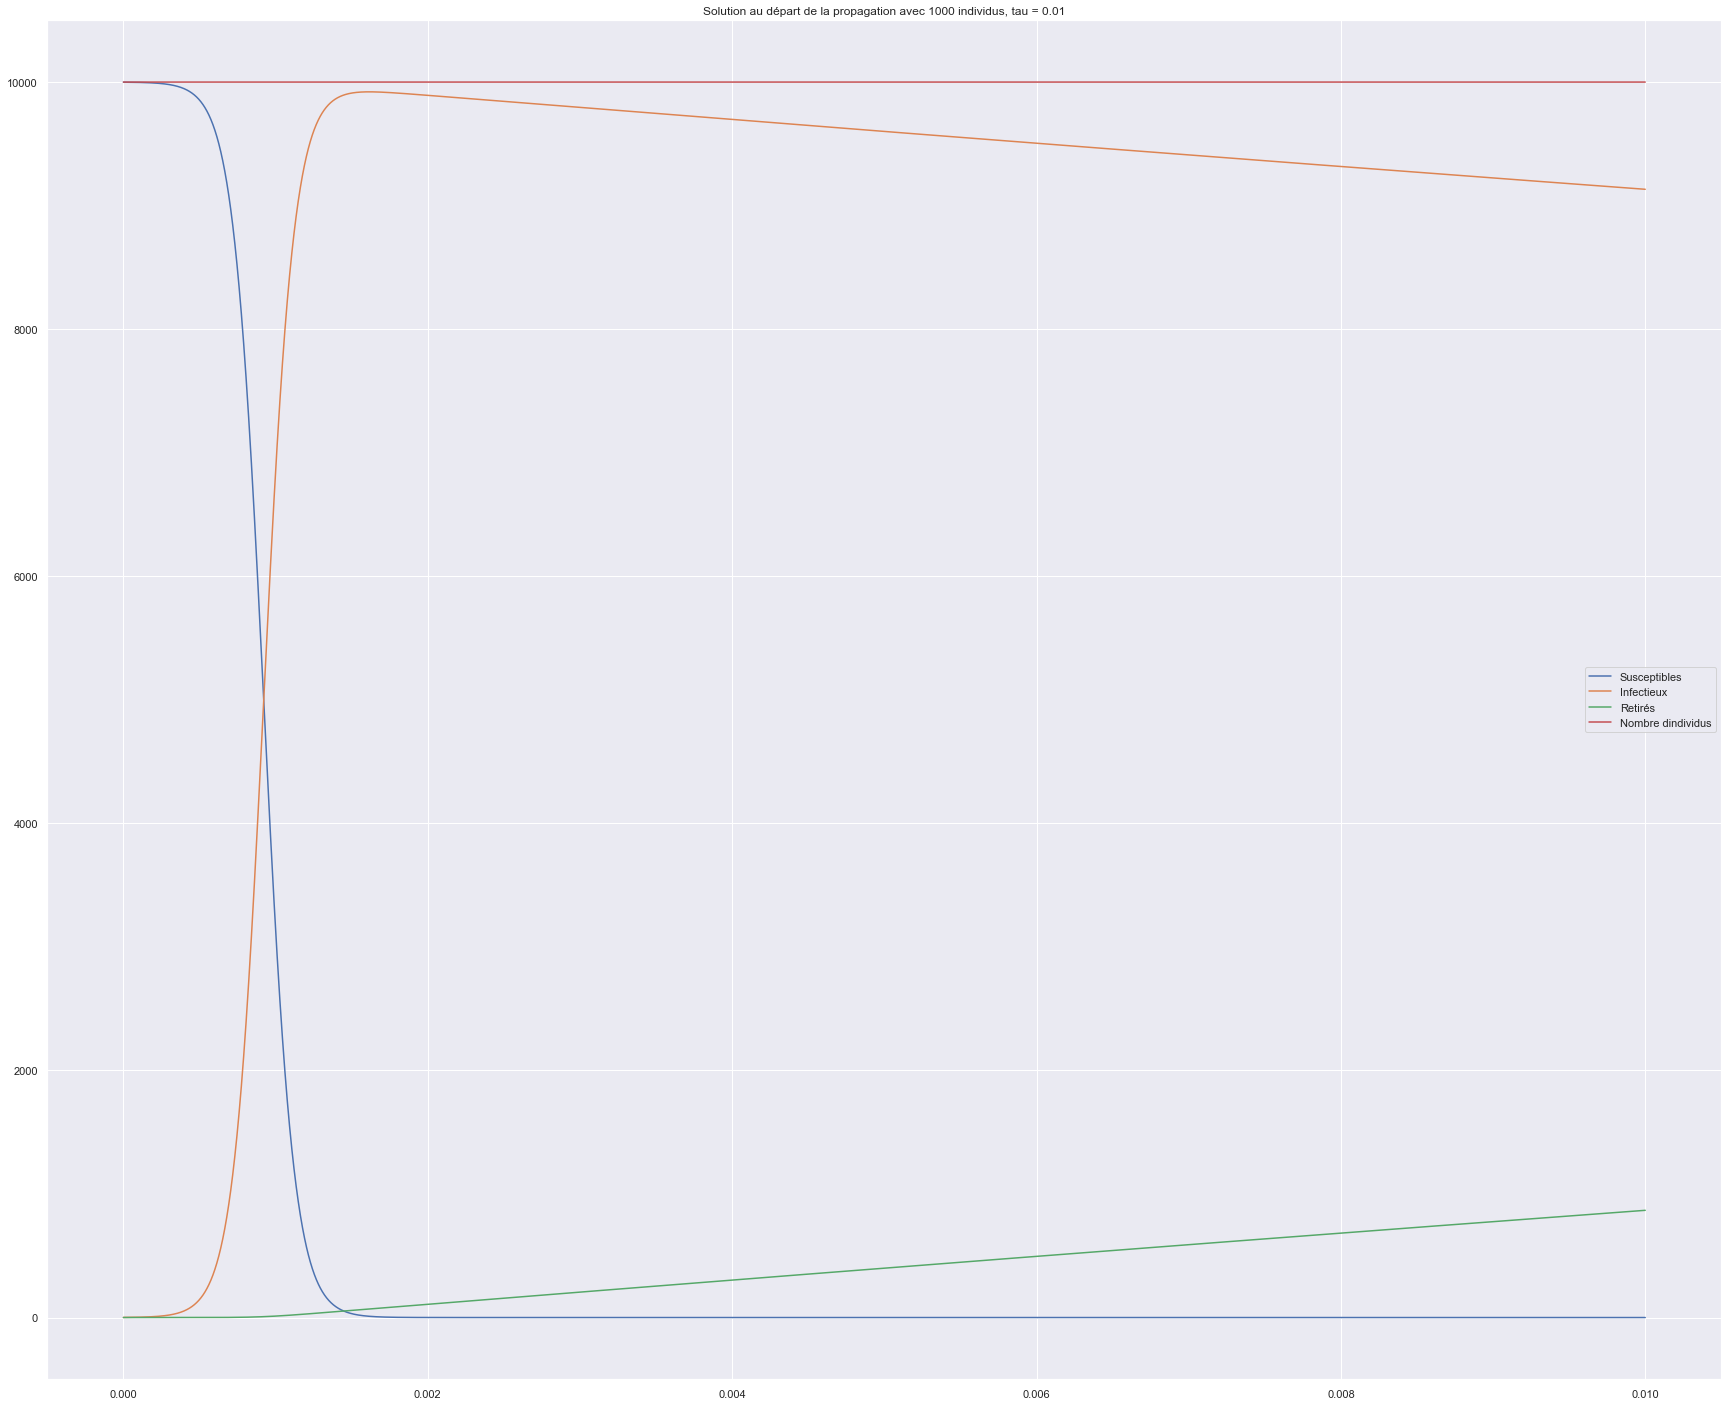

In [36]:
#Afficher solution au départ avec 1000 individus, tau = 0.01

plt.plot(solution.t,solution.y[0],label='Susceptibles')
plt.plot(solution.t,solution.y[1],label='Infectieux')
plt.plot(solution.t,solution.y[2],label='Retirés')
plt.plot(solution.t,solution.y[0]+solution.y[1]+solution.y[2],label='Nombre d''individus')
plt.title('Solution au départ de la propagation avec 1000 individus, tau = 0.01')
plt.legend()
plt.show()

Au bout d'un certain temps, tous les individus sont immunisés et donc retirés. Le nombre d'infectueux et de susceptibles tend vers 0. Ceci (à la fois de temps mais également la configuration des états finaux) est déterminé par les facteurs beta et gamma et plus précisément le rapport R0 d'infectiosité.

## Modélisation du modèle markovien

In [37]:
def nextStep(beta, gamma, s, i, r, t):
    N = s+i+r
    if s>0:
        x1 = np.random.exponential((beta*i*s)/N)
    else:
        x1 = 10**9
    x2 = np.random.exponential(gamma*i)
    
    if x1<x2:        
        t+=x1
        return (t, s-1, i+1, r)
    else:
        t+=x2
        return (t, s, i-1, r+1)
    
def graph(s, i, r, t):
    plt.figure()
    plt.clf()
    plt.plot(t, s, label = "Susceptibles")
    plt.plot(t, i, label = "Infectés")
    plt.plot(t, r, label = "Retirés")
    plt.xlabel("Temps en seconde", fontsize=20)
    plt.ylabel("Population", fontsize=20)
    plt.title("Evolution de l'épidémie en fonction du temps", fontsize=20)
    plt.legend(fontsize=20)
    
    
def simulationMarkov(N,duration, beta, gamma): #N = population, duration = durée de la simulation
    #Initialisation
    r = 0
    i = 1
    s = N
    t = 0 
    histI=[]
    histS=[]
    histR=[]
    histT=[]
    
    while(t < duration and i >0):
        histI.append(i)
        histS.append(s)
        histR.append(r)
        histT.append(t)
        t, s, i, r = nextStep(beta, gamma, s, i , r, t)
    
    return graph(histS, histI, histR, histT)
    

Pour des raisons que nous ne comprenons, les deux modèles ne semblent pas avoir de résultats similaires à beta et gamma constants en changeant la valeur de notre popultaion N. Cependant, si on change les beta et gamme du modèle markovien, on peut aboutir à des résultats semblables.

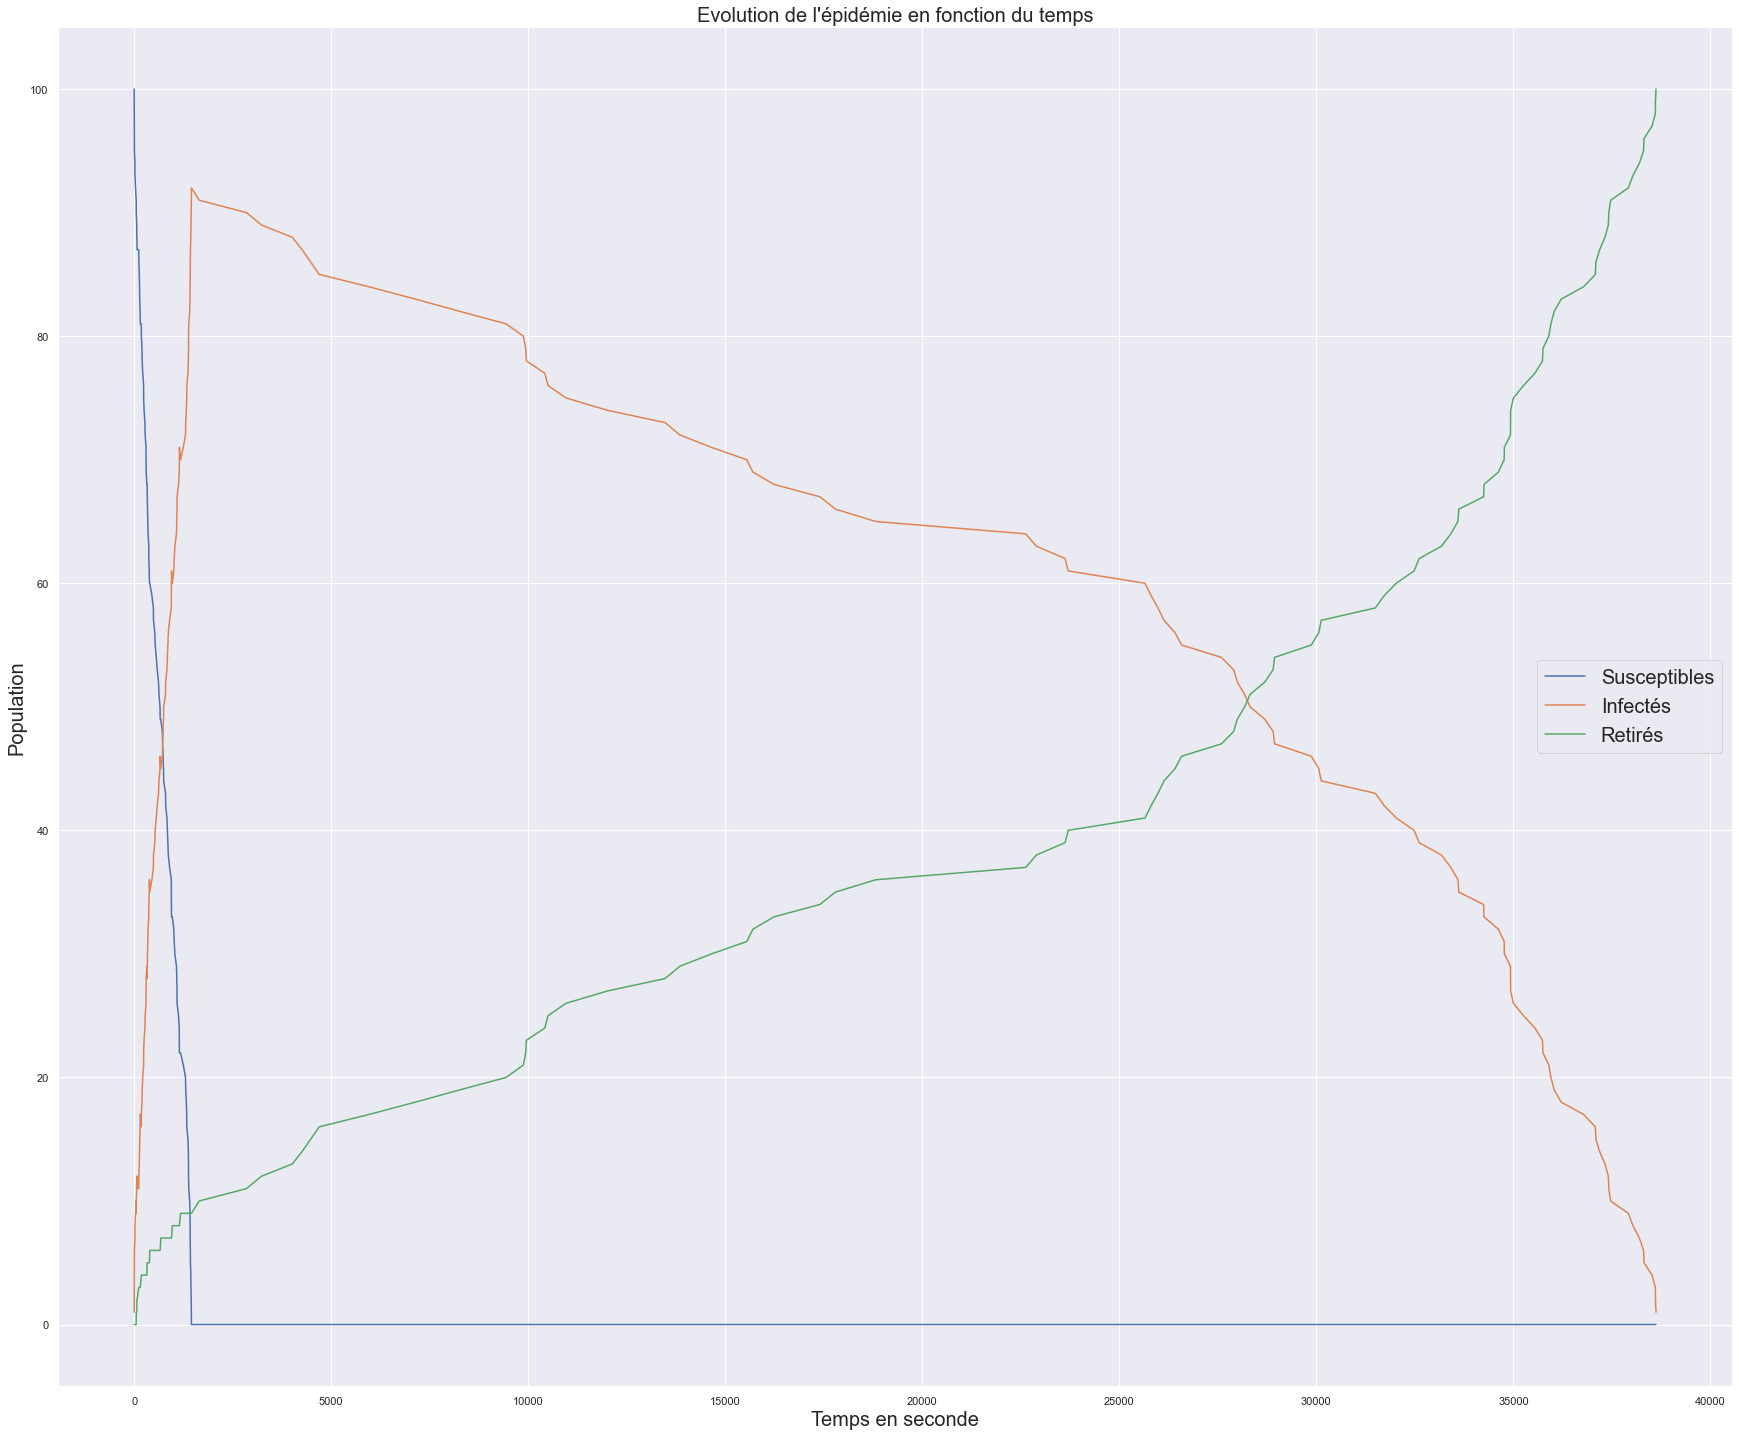

In [38]:
simulationMarkov(100, 1000000000, 1, 10)

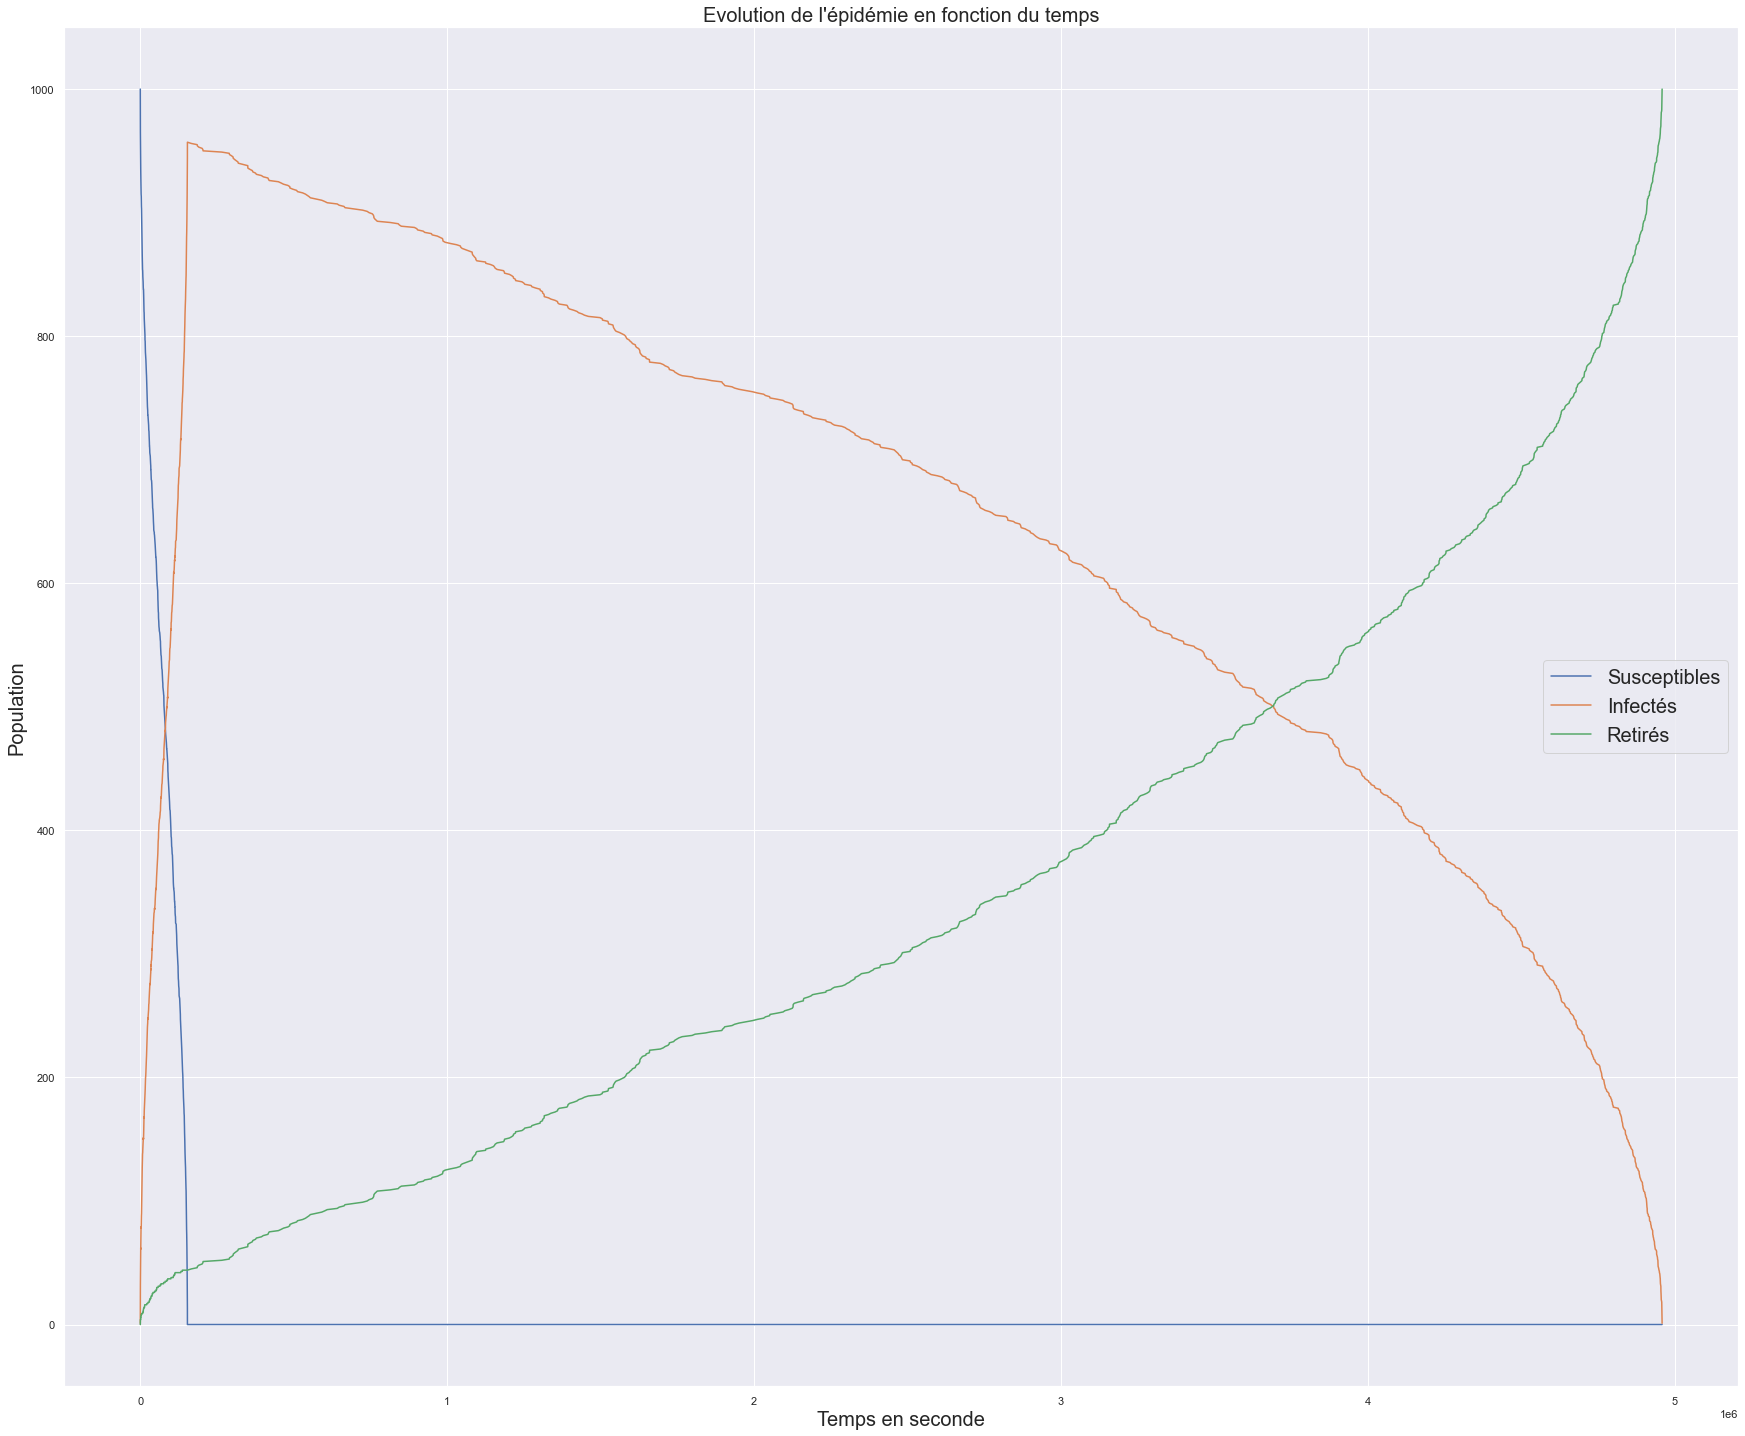

In [40]:
simulationMarkov(1000, 1000000000, 1, 10)

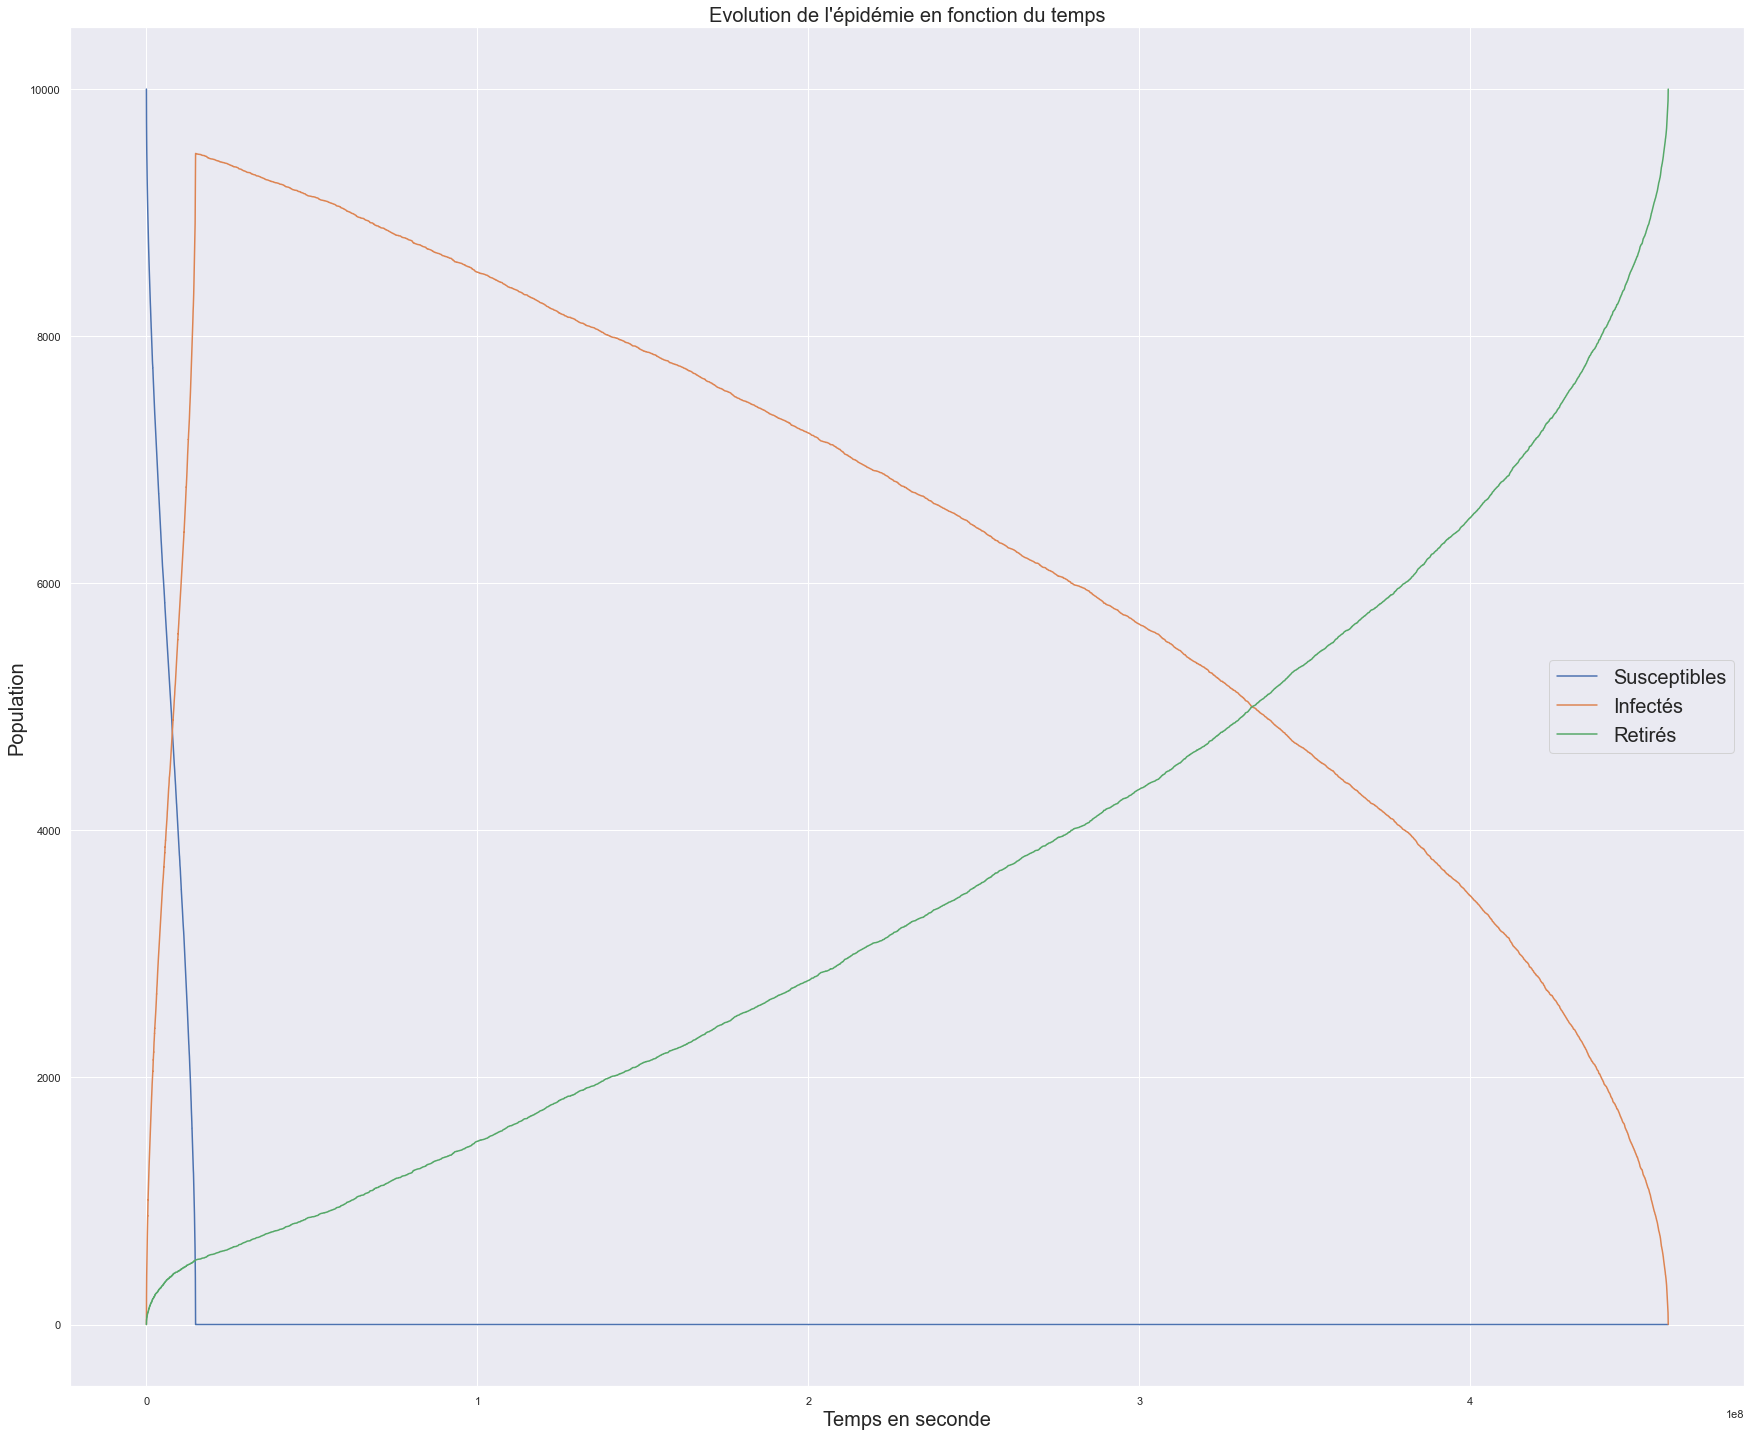

In [39]:
simulationMarkov(10000, 1000000000, 1, 10)

On observe bien que les deux modèles coincident quand N devient très grand. On a convergence du modèle Markovien vers le modèle déterministe lorsque la population N tend vers l'infini. 
Les échelles de temps restent difficiles à comparer, car il est assez dur d'estimer un temps par rapport à un nombre de transitions dans le processus de Markov. Dans la suite, pour nos tests sur les paramètres beta et gamma, nous considérerons donc le modèle déterministe.

## Tests sur les paramètres alpha et beta

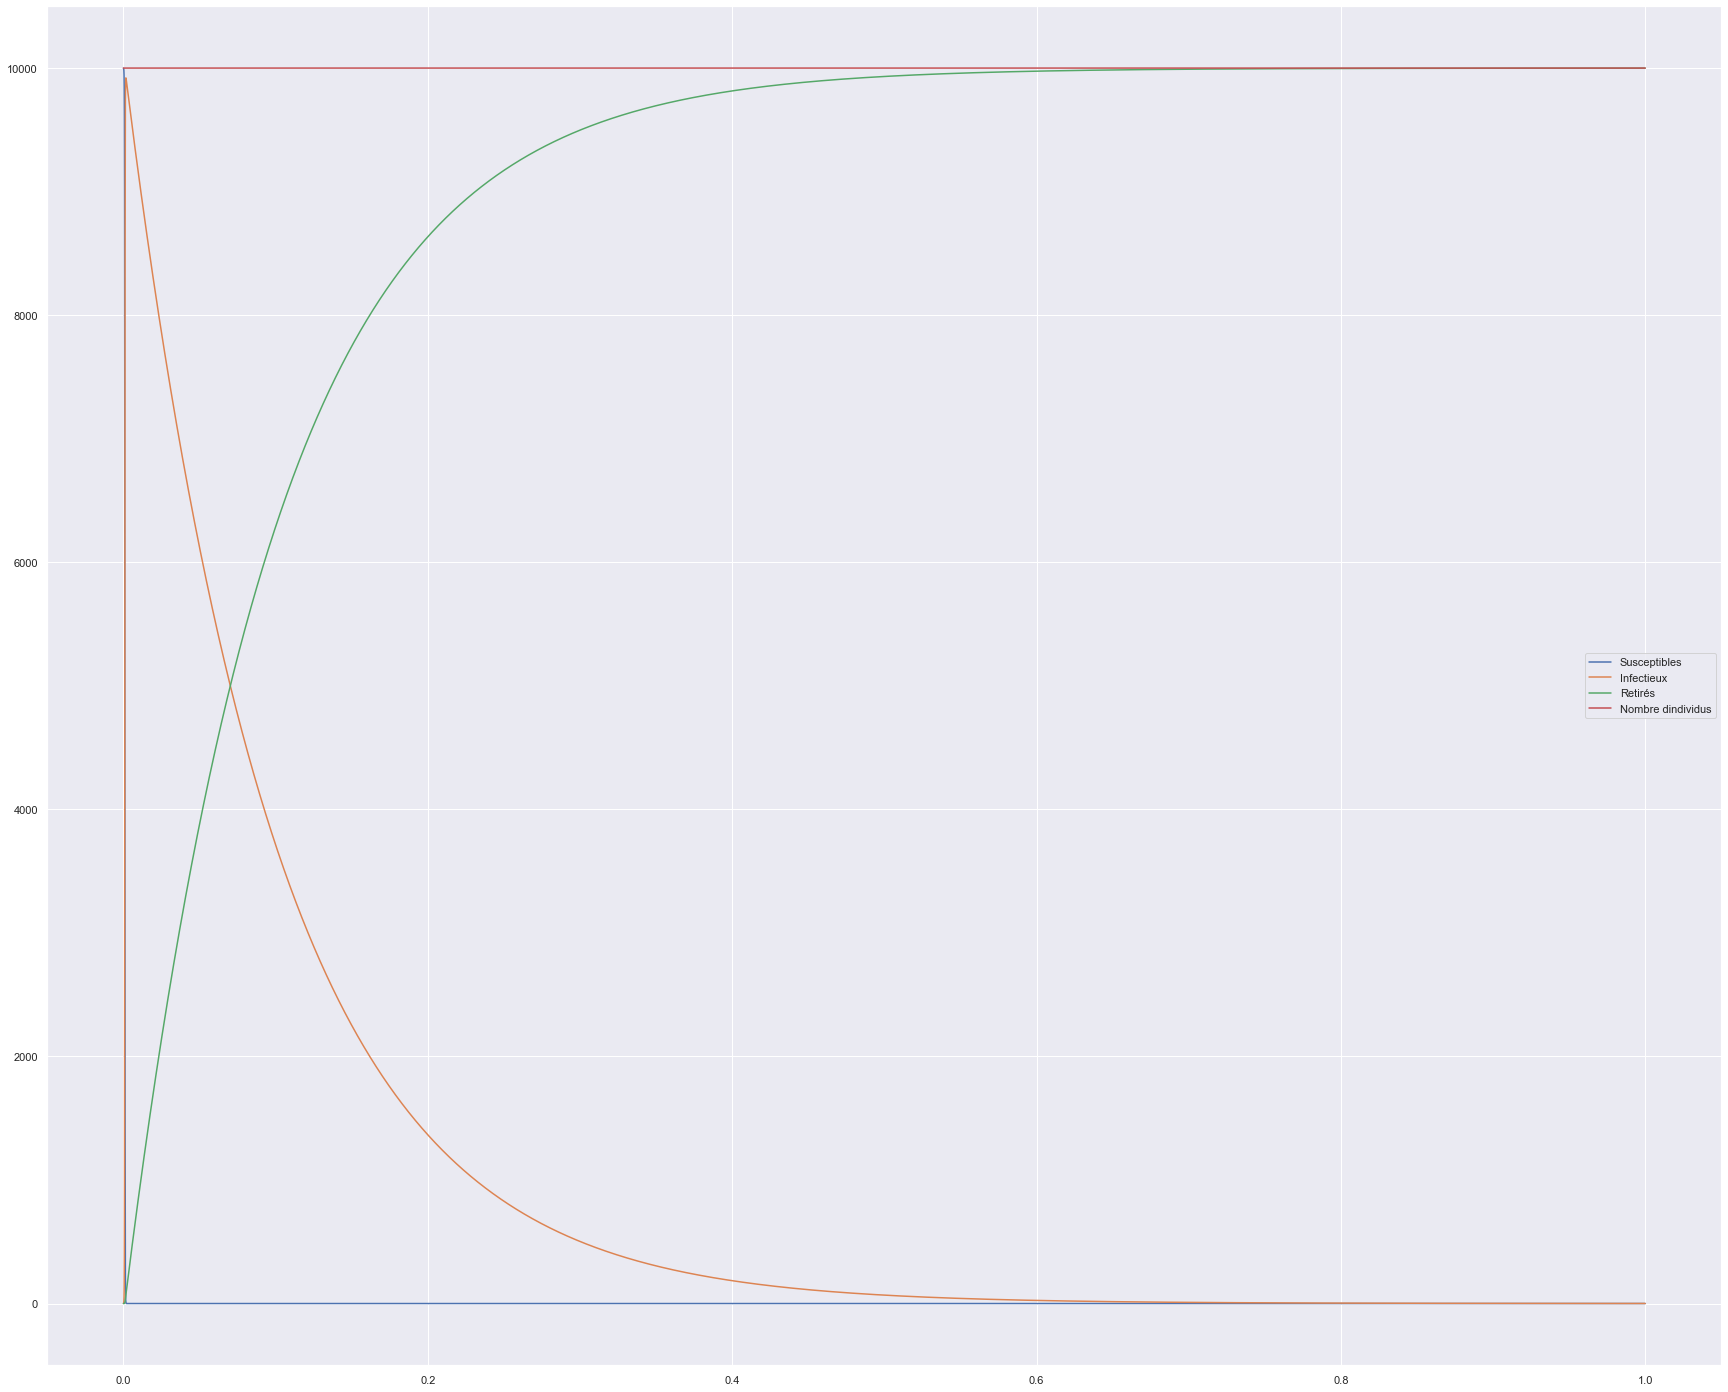

In [43]:
N = 10000
s_0, i_0,r_0 = N,1,0
t0, tau = 0,1
beta, gamma = 1, 10 ##A remplir ici les valeurs de beta et gamma

# Définition de la fonction F :
def creerF(beta, gamma):
    def F(t,tab):   # tab est de la forme [s,i,r] donc tab[0] correspond à s,tab[1] correspond à i et tab[2] à r
        return np.array([-beta*tab[0]*tab[1],beta*tab[0]*tab[1] - gamma*tab[1],gamma*tab[1]])
    return F

solution = solve_ivp(creerF(beta, gamma),[t0,tau],[s_0,i_0,r_0],max_step=tau/N)
#Afficher solution au départ avec 1000 individus, tau = 1

plt.plot(solution.t,solution.y[0],label='Susceptibles')
plt.plot(solution.t,solution.y[1],label='Infectieux')
plt.plot(solution.t,solution.y[2],label='Retirés')
plt.plot(solution.t,solution.y[0]+solution.y[1]+solution.y[2],label='Nombre d''individus')
plt.legend()
plt.show()

Pour beta = 1, gamma = 10, On constate que toute la population finit par être retiré (Tout le monde est infecté pratiquement instantanément). 

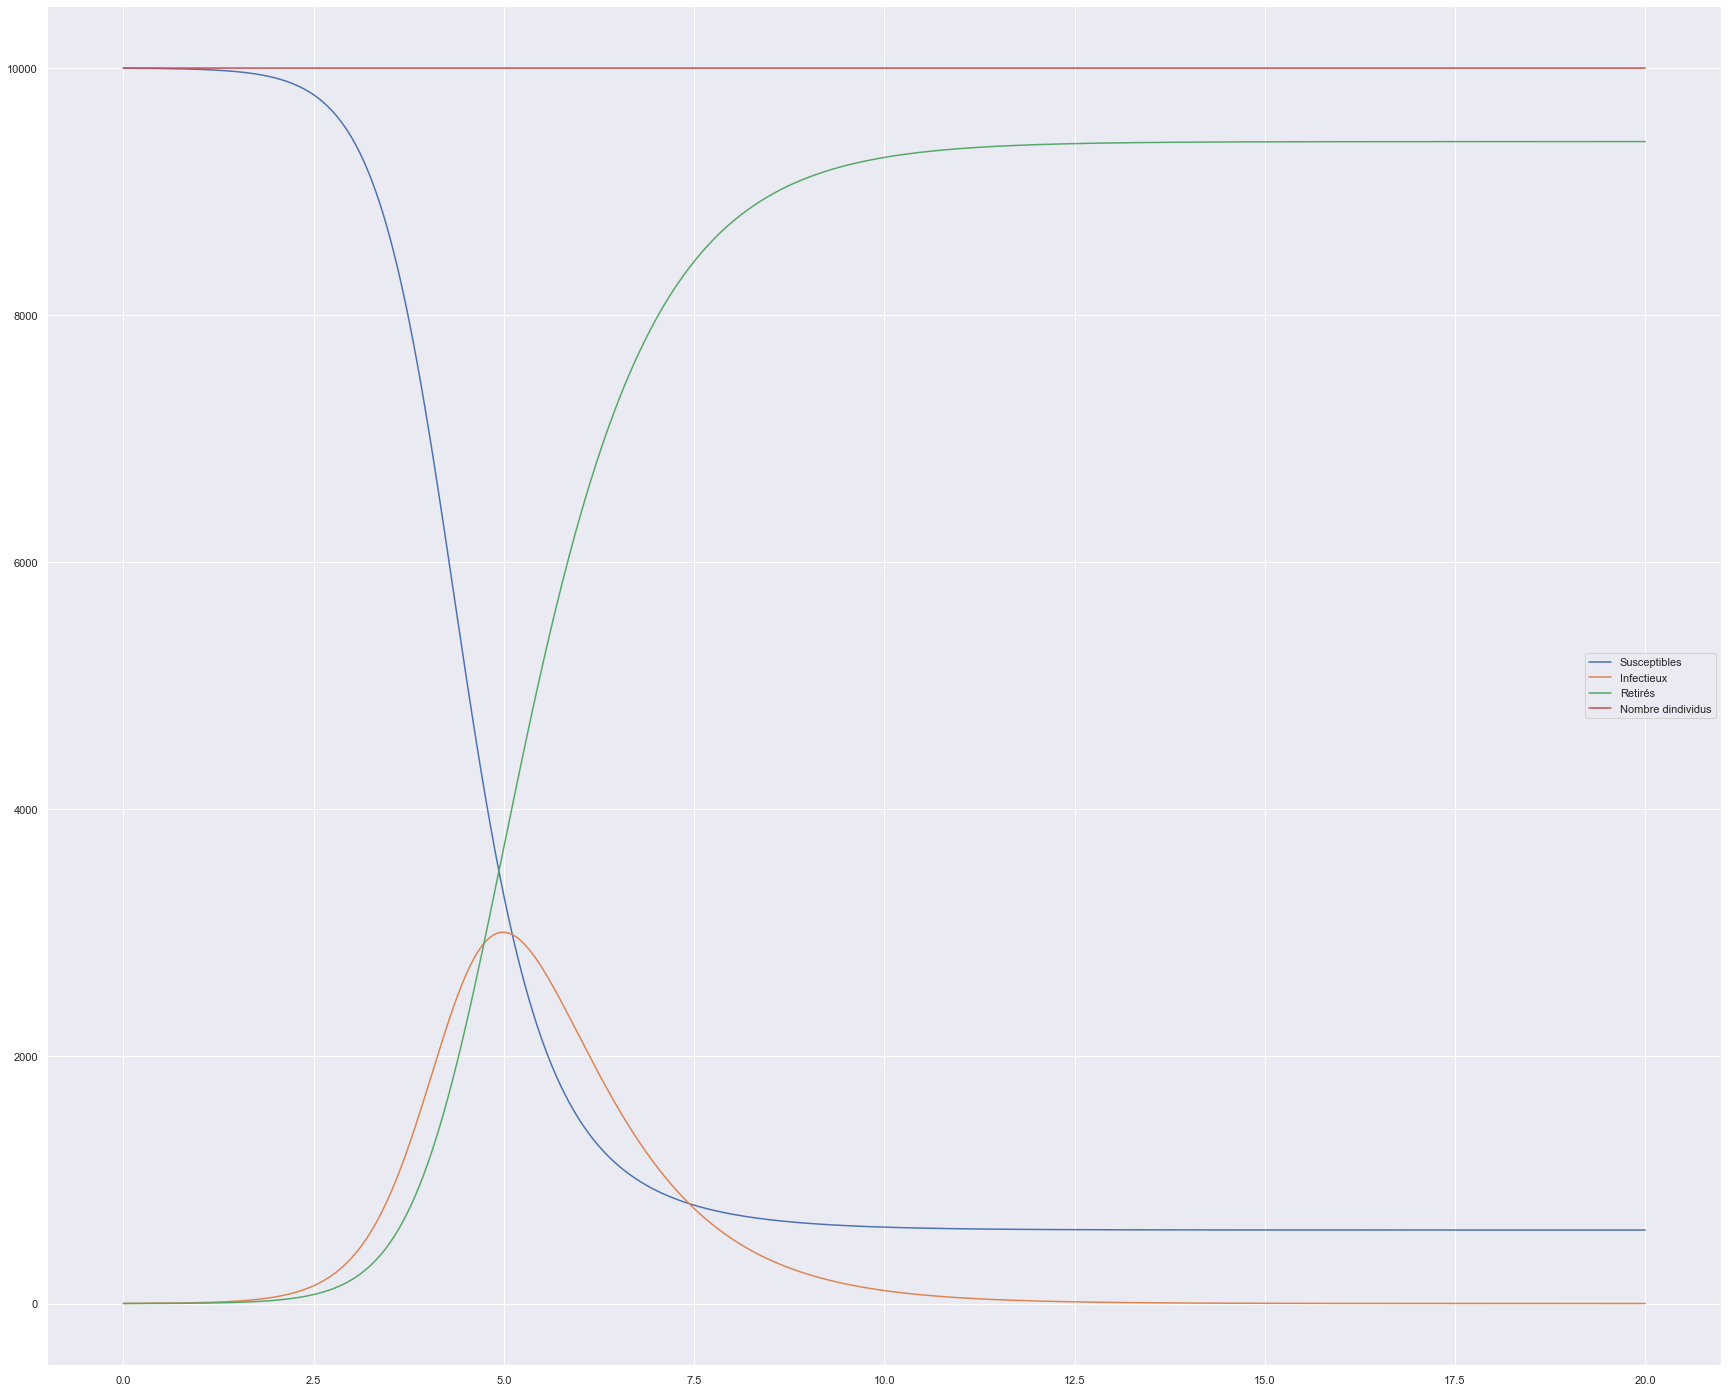

In [44]:
N = 10000
s_0, i_0,r_0 = N,1,0
t0, tau = 0,20
beta, gamma = 3*10**(-4), 1##A remplir ici les valeurs de beta et gamma

# Définition de la fonction F :
def creerF(beta, gamma):
    def F(t,tab):   # tab est de la forme [s,i,r] donc tab[0] correspond à s,tab[1] correspond à i et tab[2] à r
        return np.array([-beta*tab[0]*tab[1],beta*tab[0]*tab[1] - gamma*tab[1],gamma*tab[1]])
    return F

solution = solve_ivp(creerF(beta, gamma),[t0,tau],[s_0,i_0,r_0],max_step=tau/N)
#Afficher solution au départ avec 1000 individus, tau = 20

plt.plot(solution.t,solution.y[0],label='Susceptibles')
plt.plot(solution.t,solution.y[1],label='Infectieux')
plt.plot(solution.t,solution.y[2],label='Retirés')
plt.plot(solution.t,solution.y[0]+solution.y[1]+solution.y[2],label='Nombre d''individus')
plt.legend()
plt.show()

On constate que pour beta = 0.0003, gamma = 1, l'infection se termine avec un nombre de susceptibles non nul. 

## Estimation de gamma et beta

Pour estimer le paramètre gamma, il suffit de regarder le temps moyen où les patients restent à l'hôpital. Quelle est la durée moyenne de leur maladie ?

Bien que cette donnée ne soit pas donnée explicitement dans le .csv du gouvernement, on peut, en sommant le nombre d'admis, et enlevant le nombre de décès / retour à la maison, savoir en permanence combien de personnes sont actuellement infectés. En calculant le nombre de personnes qui meurent / rentrent chez elles, on peut déterminer le taux du nombre de personnes retirés par jour. 

Pour déterminer beta, c'est plus difficile, puisque les données d'admission en hôpital ne permettent pas de savoir le nombre réel d'infectés, dans le cas du COVID (beaucoup de personnes sont asymptomatiques et ne vont donc pas à l'hôpital, même si elles sont malades). On a donc besoin du taux d'asymptomatiques dans la population pour cela. Il faut donc trouver un certain nombres de malades, et regarder lesquels ont eu des symptômes. Une fois ce taux connus, on peut estimer le nombre réel d'infectés en fonction du nombres d'infectés dans les hopitaux. On sait qu'au début de l'épidémie, l'évolution du nombre d'infectés est exponentielle, car il y a très peu de personnes déjà infectées, très peu de personnes immunisées. Le taux de croissances de la courbe des infectés est donc égale, dans un premier temps, à beta. on peut alors le trouver par une régression linéaire. 